# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks only
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [6]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


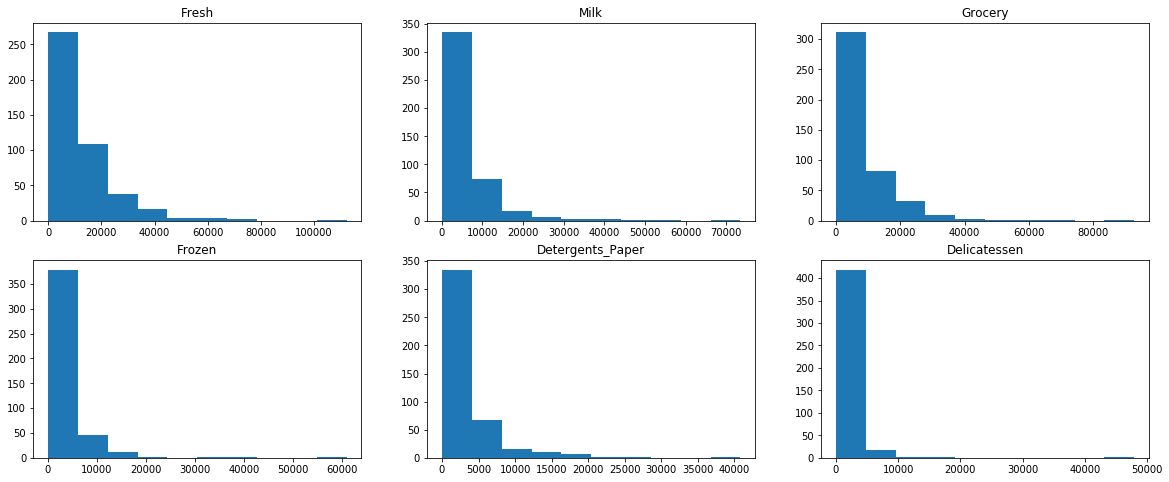

In [7]:
# Historgram to see each category distribution visually
import matplotlib.pyplot as plt

# set figure with subplot
fig, ax = plt.subplots(nrows=2, ncols=3 , figsize=(20,8))

counter = 0
while counter < 6:
    for i in range(2):
        for j in range(3):
            ax[i,j].hist(data.iloc[:,counter])
            ax[i,j].set_title( data.keys()[counter])
            counter += 1
 
plt.show()

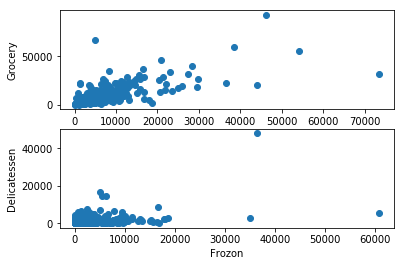

In [8]:
# scatter plot :based on Hitgrams looks like Frozon&Deli  and Milk&Grocery have similar trend

#plt.scatter( data['Milk'], data['Grocery'])
fig2, ax2 = plt.subplots(  nrows=2, ncols=1)

ax2[0].scatter( data['Milk'], data['Grocery'])
ax2[1].scatter( data['Frozen'], data['Delicatessen'])

ax2[0].set_xlabel('Milk')
ax2[0].set_ylabel('Grocery')

ax2[1].set_xlabel('Frozon')
ax2[1].set_ylabel('Delicatessen')

plt.show()

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [9]:
data.keys()
#'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',    'Delicatessen']
#data.loc[:,'Fresh'][0:5]


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [20]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [100,70,10]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,16705,2037,3202,10643,116,1365
2,3366,5403,12974,4400,5977,1744


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer**:
My sample 
[0] could be a  midium quality restaurant or a small hotel with restaulant. This custumer spent more than the average amount of money on all food items except on fresh produce which indicated that it might not be a high-end restaurant. Higher spending on detergent and peper products indicated that they might use more napkin or possibly sheets which requred detergents tp clean.

My sample[1] could be a midsize restaurant at seaside tourist area. This customer spent above avarage money on Fresh and Frozen, but much less on everything else. If a restaurant served fresh produce(like crabs) as a main attraction, then during the off season when crabs were not in season, they would need to have frozon crabs to serve thier customers.

My sample[2] could be a cafeteria at hospital or school. The amount they spent on groceary was above 75 percentile, but they spent less than average money on fresh. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [13]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis=1)


# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split( new_data, data['Grocery'], test_size=0.25, random_state=25)

# TODO: Create a decision tree regressor and fit it to the training set
####################################################
# nxs DECISION TREE? why? or linear regression?. I'm using regression cuz Tree doesn't make sense
###################################################
#from sklearn import tree
#regressor = tree.DecisionTreeClassifier( random_state=17)
#regressor.fit( X_train , y_train )
#y_pred = regressor.predict( X_test )


from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = regressor.score( X_test, y_test)
print(" R^2 score is:", score)

 R^2 score is: 0.919163739641


In [14]:
y_test.head()

404     3444
420    13227
95      6252
337     2611
338     7021
Name: Grocery, dtype: int64

In [15]:
y_pred[0:5]

array([  4440.72121263,  14296.06077133,   2380.52730764,   3048.22725817,
         1971.55892724])

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

Q1. Which feature did you attempt to predict?  ===> 
A1. My model was going to predict `Grocery`.

Q2. What was the reported prediction score?  ===>
A2. My reported prediction score ( R^2) was 0.919.

Q3. Is this feature necessary for identifying customers' spending habits? ===>  
A3. No. R^2=0.919 indicates that the feature, `Grocery` can be estimated fairly accurately from all the other features. 


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

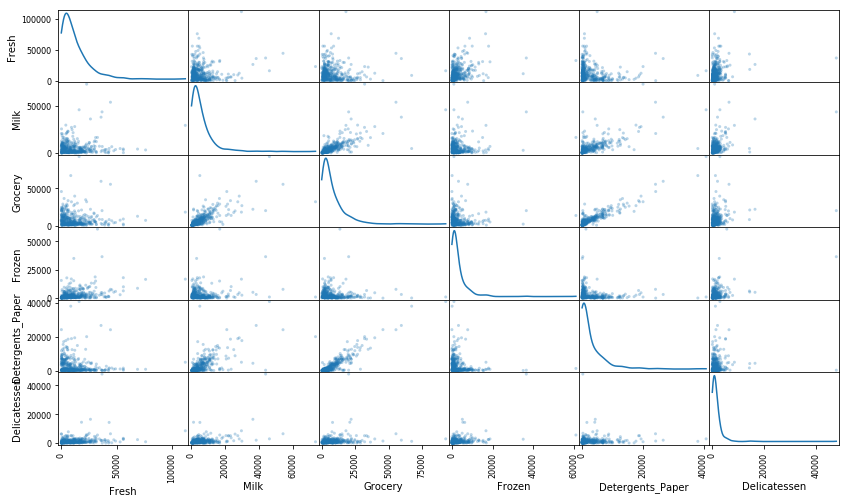

In [16]:
# Produce a scatter matrix for each pair of features in the data
from pandas import plotting
plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

In [17]:
#check correlation matrix
# my suspition: Milk vs Grocery, Milk vs Detergents,  Grocery vs Detergents
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


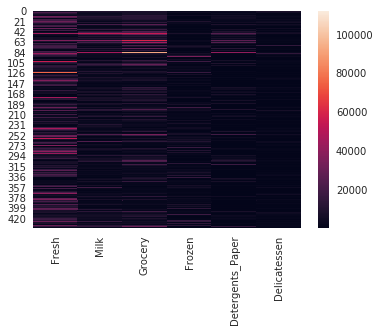

In [18]:
#Heat map
import seaborn as sns
from matplotlib import colors 
###############################################
#nxs: HOW can I improve teh Heatmap better??? #
###############################################
#color_choice = colors.ListedColormap(['c'])
sns.set()
sns.heatmap(data)
#less_data=data.drop(['Delicatessen'], axis=1)
#sns.heatmap(less_data)

 

**Answer:**

- Based on the scatter plot, I suspected that the following feature combinations were correlated because the data points seemed to form a line pattern: `Milk` & `Grocery`, `Grocery&Detergents`, and `Milk&Detergents`. In fact, these feature combinations had high corrrelation scores:  `Milk` & `Grocery`=0.7, `Grocery` & `Detergents`=0.92, and `Milk` & `Detergents`=0.66.  Another aspect I noticed was that the scatter plots for Delicatessen against any feature had clumpeed pattern of the data that located close to the origin. My thought was that `Delicatessen` had the smallest standard deviation among all the features, and the variance ( or scale) differnce between `Delicatessen`  and other features was cauisng this phenomina. The data might need to be re-scaled.

- There were outlieres in all features according to the scatter plots.  Also, the extistance of outliers in the data set was obsered from Histgram and the statistics,Min/Max/std from the previous section. 

- My test featrue was `Grocery`, and based on R^2=0.9, I concluded that this feature could be predicted by other features. I believed that my prediction was reasonable since `Detergents` and `Milk` had high correlation 0.92 and 0.7, respectively. 

- I think all features are skwed to left and have long tail, in other words, they don't seem to have Gaussian distribution.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

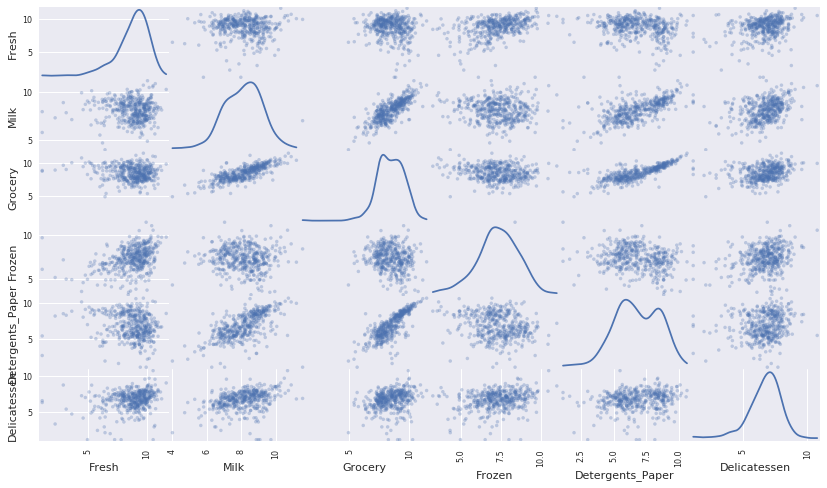

In [21]:
# TODO: Scale the data using the natural logarithm
# use numpy log
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [22]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
1,9.723463,7.619233,8.071531,9.272658,4.753590,7.218910
2,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [23]:
# For each feature find the data points with extreme high or low values
import pandas as pd

outlier_indices=set()
check_each_feature=[]

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data[feature].quantile(q=0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data[feature].quantile(q=0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3- Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # to check which outliers are in each column 
    condition_indices=np.where( ~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)) == True)[0] 
    check_each_feature.append(condition_indices)
    
    # selecting indices for outliers
    outlier_indices.update(np.where(
        ~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)) == True)[0] )
    
# Select the indices for data points you wish to remove
outliers  = list(outlier_indices)

print( sorted(outlier_indices))

# Remove the outliers, if any were specified
#  .reset_index(drop=True) to avoid the old index being added as a column
good_data = log_data.drop(outlier_indices).reset_index(drop=True)



#print(list(reversed(sorted(outlier_indices))))
#help(log_data['Fresh'])
#for k in sorted(log_data):
#    print(k)
#    for outl in reversed(sorted(list(map(int, outlier_indices)))):
#        print('removing {}'.format(outl, log_data[k]))
#        log_data[k].pop(outl)
#good_data = log_data.drop().reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[38, 57, 65, 66, 75, 81, 86, 95, 96, 98, 109, 128, 137, 142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]


In [26]:
print(good_data.head(2))
print(good_data.shape)


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1  8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
(398, 6)


In [16]:
print(check_each_feature)

[array([ 65,  66,  81,  95,  96, 128, 171, 193, 218, 304, 305, 338, 353,
       355, 357, 412]), array([ 86,  98, 154, 356]), array([ 75, 154]), array([ 38,  57,  65, 145, 175, 264, 325, 420, 429, 439]), array([ 75, 161]), array([ 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343])]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer**:
There were some data points that were identified as outlier in multiple features. For example, one customer spent $3 on `Grocery` and `Detergents_papper` and this customer's data was identified as outlier in `Grocery` and `Detergents_paper` features.(see below for a complete list) Many points idenitified as outliers had close to the minimal values in one or more freatures. 
Removing outliers was important especially when using K-mean clustering.  The clusitering process uses a distnce between the centroid of cluster to each point to calculate error values(via loss function). If we didn't eliminate outliers, loss function could be very high due to the fact that outliers can be far from the nearlest centroid.  


In [24]:
#data.iloc[[38, 57, 65, 66, 75, 81, 86, 95, 96, 98, 109, 128, 137, 142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 
#           338, 343, 353, 355, 356, 357, 412, 420, 429, 439],:]
#print(list(outlier_indices))
data.loc[list(outlier_indices)] 
#print(outlier_indices)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,140,8847,3823,142,1062,3
264,1073,9679,15445,61,5980,1265
137,3087,8080,8282,661,721,36
142,37036,7152,8253,2995,20,3
145,22039,8384,34792,42,12591,4430
154,622,55,137,75,7,8
412,97,3605,12400,98,2970,62
285,40254,640,3600,1042,436,18
161,12434,540,283,1092,3,2233
289,42786,286,471,1388,32,22


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.49930484  0.22594807  0.10488309  0.09781761  0.04879109  0.0232553 ]


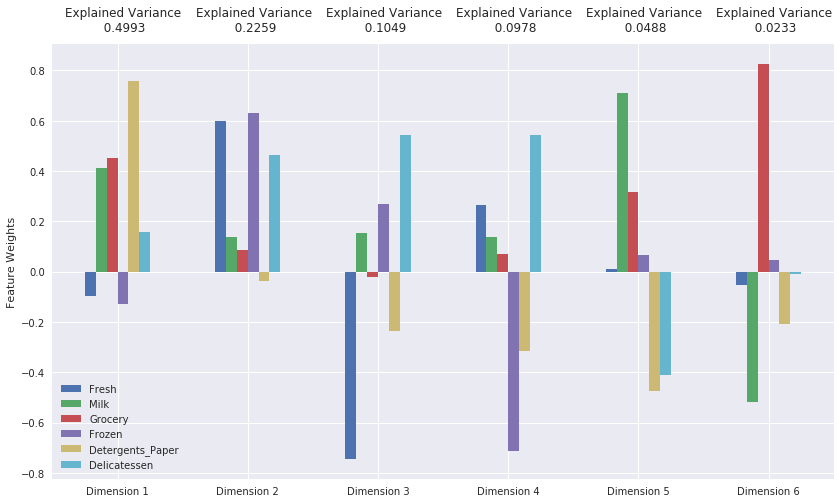

In [25]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit( good_data)
print(pca.explained_variance_ratio_)

# TODO: Transform log_samples using the PCA fit above
pca_samples =pca.transform(log_samples)

# Generate PCA results plot
# vs is supprimental code provided by Udacity
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

*Answer*:<br>
* The first component mainly consisted of `Grocery`, `Milk`, and `Detergent` with positive weights of 0.4, 0.4, and 0.8, respectively.  Also the first component had an explained variance of 0.49. 
* The second component consisted of mainly `Fresh`, `Frozen`,and `Delicatessen` with positive weight of approximately 0.5, 0.6 and 0.4, respectively. This component could explain about 23% of variability in the data, and combining 1st and 2nd component provided 72.52%  explained variability. 
* The third component's  driven forces was `Fresh` (negative weight of more than 0.7) and `Delicatessen` ( positive weight of about 0.5). Its explained variance was 0.1049.  Using 1st through 3rd principal components, 83% of the variability in the data could be explained. 
* The fourth component mainly consisted of `Frozen`(negative weight of about 0.6),and `Delicatessen`(positive weight of about 0.5).  Combining the 1st to 4th principal components, it could explain 83.68% of the variability in the data. This would indicate that adding the 4th component did not provide much value since the 1st to 3rd components already had 83% of explained variability.
* The fifth components had `Milk` with high positive weight ( about 0.7) `Delicatessen` (negative weight of  approximately 0.55) and `Detergent`(negative weight of 0.5). Its explained variance was 0.048.
* The six component mainly consisted of `Grocery` with very high positive weight of 0.8 and `Milk` with negative weight of 0.5. Its explained variance was 0.0233.

<br>
*Summary*: <br>
Based on the result of the 1st component,  3 features (`Grocery`, `Milk`, and `Detergent`  conveied a lot of information about customer’s consumption patterns who spend money on all of these three features. This maked sense since these three features had strong correlations ( high R^2 values). Also, almost 50% of variability in the data could be explained with the first principal component.  From the 2nd to 4th components, it was clear that `Fresh` and `Frozen`  described a similar consumption pattern.  In the 2nd component, they both had the similar positive weights and in the 3rd and 4th components, each of the features carried negative weights while  `Delicatessen` carried a positive weight.  In other words, spending more or less money of `Fresh` and `Frozen` and  `Delicatessen` provided  a certain consumption pattern to identify customers.  Also, if customer spent less on `Frozen` or `Fresh`, but more on `Delicatessen`, this provided some information about customer.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [26]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))
display(log_samples)
display(samples)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.5291,1.3485,0.1094,-0.2050,-0.5879,-0.0808
1,-2.1548,1.8077,0.5371,-0.3283,0.4570,0.4361
2,2.1793,0.5069,0.8243,-1.0031,-0.4516,0.3107


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
1,9.723463,7.619233,8.071531,9.272658,4.753590,7.218910
2,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,16705,2037,3202,10643,116,1365
2,3366,5403,12974,4400,5977,1744


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [27]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca2 = PCA(n_components=2)
pca2.fit(good_data)
print(pca2.explained_variance_ratio_)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca2.transform(good_data)
print("Original shape is {}, and reduced is {}".format(good_data.shape,reduced_data.shape ))

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca2.transform(log_samples)
print("Original shape is {} and trandomed sape is {}".format( log_samples.shape,pca_samples.shape))
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

[ 0.49930484  0.22594807]
Original shape is (398, 6), and reduced is (398, 2)
Original shape is (3, 6) and trandomed sape is (3, 2)


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [28]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.5291,1.3485
1,-2.1548,1.8077
2,2.1793,0.5069


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

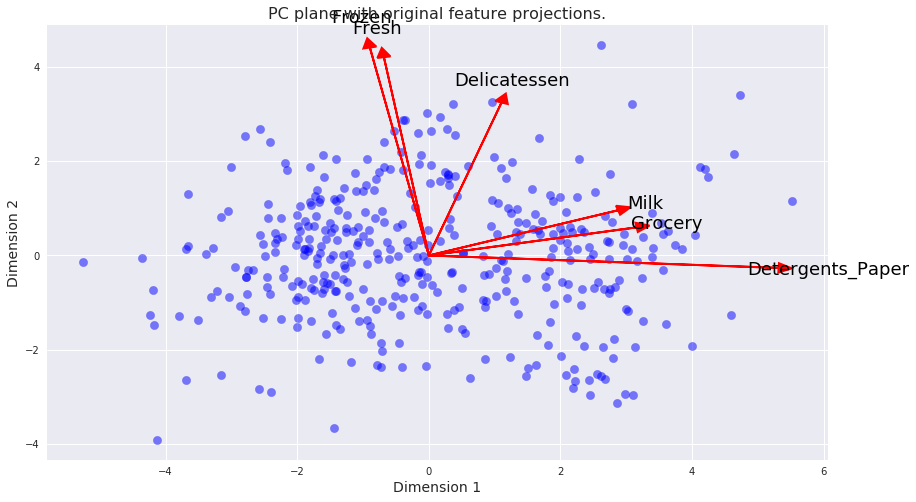

In [29]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer**:

* The advantage of using K-Means clustering is that it is a fast, robust, and simple algorithm when the number of cluster centers can be specified due to a well-defined list of features in the data. ( but it doesn't work well when data has heavy overlapping or has many ontliers or the data set doesn't has circular or sphilical shape.

* The advantage of using GMM is that this is a soft clustering method so that data clusters can be any shapes. ( but it is sencitive to initialization.

* I would use K-means clustering. The log transformed data with the PCA (n_comonents=2)result indicates that  the data seemed to have circular shape. Also, each feacher of the data has a clear label. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [30]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

for i in range(2,3): #range(2,7) ran this for getting results for different # of clusters.
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    cluster = KMeans(n_clusters=i)
    cluster.fit(good_data)

    # TODO: Predict the cluster for each data point
    preds = cluster.predict(good_data)

    # TODO: Find the cluster centers
    centers = cluster.cluster_centers_
    print(centers)
    print(centers.shape)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    # silhouette [-1,1]
    score = silhouette_score(good_data, preds)
    print(" When cluster = {}, the score is {} ".format( i,score))
    
    
    # TODO: Predict the cluster for each transformed sample data point
    # WHAT AM I SUPPOSED TO DO?
sample_preds = cluster.predict( log_samples)
print( sample_preds)

[[ 8.65670766  8.93551503  9.35690527  6.97652851  8.39411131  7.03874862]
 [ 9.11753872  7.57954329  7.79443265  7.73037442  5.71868486  6.64314938]]
(2, 6)
 When cluster = 2, the score is 0.3230700912331006 
[0 1 0]


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer**:<br>
 When the number of cluster is 2, we have the highest silhouette score of 0.32. 
 <br>
When cluster = 2, the score is 0.3230700912331006 
<br>
 When cluster = 3, the score is 0.23057045554823596 
<br> 
 When cluster = 4, the score is 0.18931916265716336 
<br> 
 When cluster = 5, the score is 0.19427586149102727 
<br> 
 When cluster = 6, the score is 0.20635263135340207 



### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

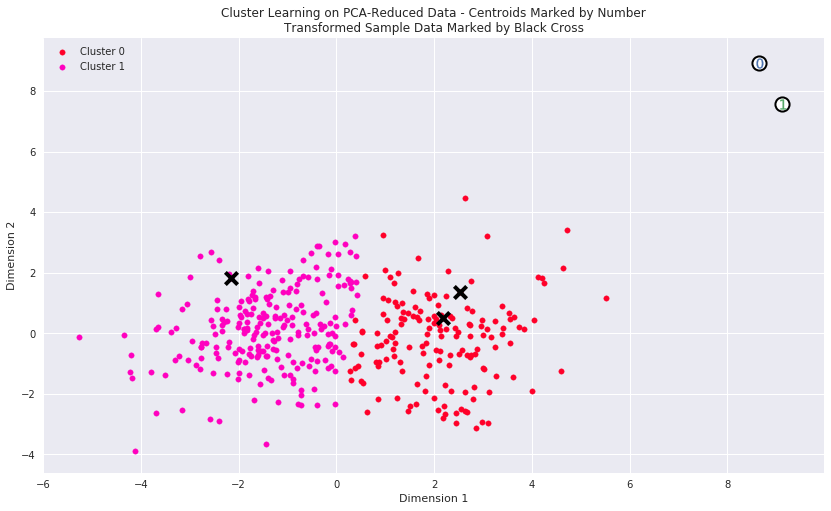

In [31]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [32]:
# TODO: Inverse transform the centers
# pca.comonents_ is n_comp, n_feature, so in this case n_row x 6 features (pca might picked 2 features)
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(centers)
display(log_centers)
display(true_centers)

array([[ 8.65670766,  8.93551503,  9.35690527,  6.97652851,  8.39411131,
         7.03874862],
       [ 9.11753872,  7.57954329,  7.79443265,  7.73037442,  5.71868486,
         6.64314938]])

array([[  8.05844712,  17.6068871 ,  21.86747957,  10.3661871 ,
          3.19254422,  17.65691916],
       [  8.55521153,  15.78278227,  20.87058135,   8.29997292,
          5.0700332 ,  17.77044942]])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3160.0,44317363.0,3.139972e+09,31767.0,24.0,46591057.0
Segment 1,5194.0,7151139.0,1.158719e+09,4024.0,159.0,52192503.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer**:

For both Segments 0 and 1: My guess would be that they could be both fastfood restaurants or chain family-restaurants, but  Segment0 is mid size and segment1 is larger restaurants because of over all spending differnces. Both segments of all features, except `Frsh` and `Detergent` spent way beyond the mean value. This indicated that they were a high volume food supplier. Also, extremely low spending on `Fresh` ( 25% of the mean value of `Fresh`) in contrast to spending for other features, could indicate that they were not high-end because they didn't serve fresh produce to customers. 

<br>
Segment 0 	5194.0 	 7,151,139.0 	1.158719e+09 	4024.0 	159.0 	52192503.0
Segment 1 	3160.0 	44,317,363.0 	3.139972e+09 	31767.0 	24.0 	4,6591,057.0
feature  Mean <bar>
Fresh   12,000 <bar>
Milk     5,796 <bar>
Grocery  7,951 <bar>
frozen   3,072 <bar>
Deter    2,881 <bar>
Deli     1,525 <bar>
    
    

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [33]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer**: sample_point1 and sample_point3 have very simplar log values ( from log_sample data). It makes sense that they are in the same cluster. This result matches to the predicted result from pca.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer**: If customers purchased mainly non-parishable items such as `Grocery` or `Detergent`, or `Frozen` items, then they would prefer to have less frequent delivery because they could stock up items and also less delivery meant less stocking day. Moreover, less frequent delivery could be well appreciated especially for those who purchased a small quantity of non-perishable items. But, less frequent delivery might not be welcomed by those who purchased perishable items such as `fresh` produce or `milk`.     

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer**: We can use a fitted model trained by the original customer data as our base. Then like what we did for the sample data, we can calculate prediced values using the new 10 customers data feed into the fitted model. The model for this assignment indicates using 2 clusers is the best so our estimated outcome could be a boolean (`is_in_cluster`
0=Yes or Not). So we could apply regression with the same features.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

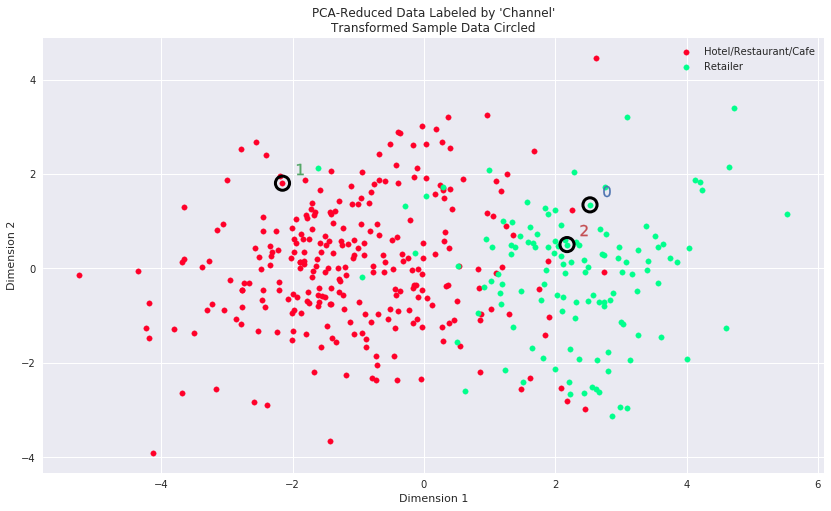

In [34]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer**: The cluster algorithm came up with 2 clusters, and the `Channel`plot and the plot from PCA applyed original data seem identical. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.